In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
%cd ../../..
df = pd.read_csv(r"data/M7_ML_AD/Wholesale customers data.csv")
df.head()

c:\Users\remco\desktop\github\datacademy


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


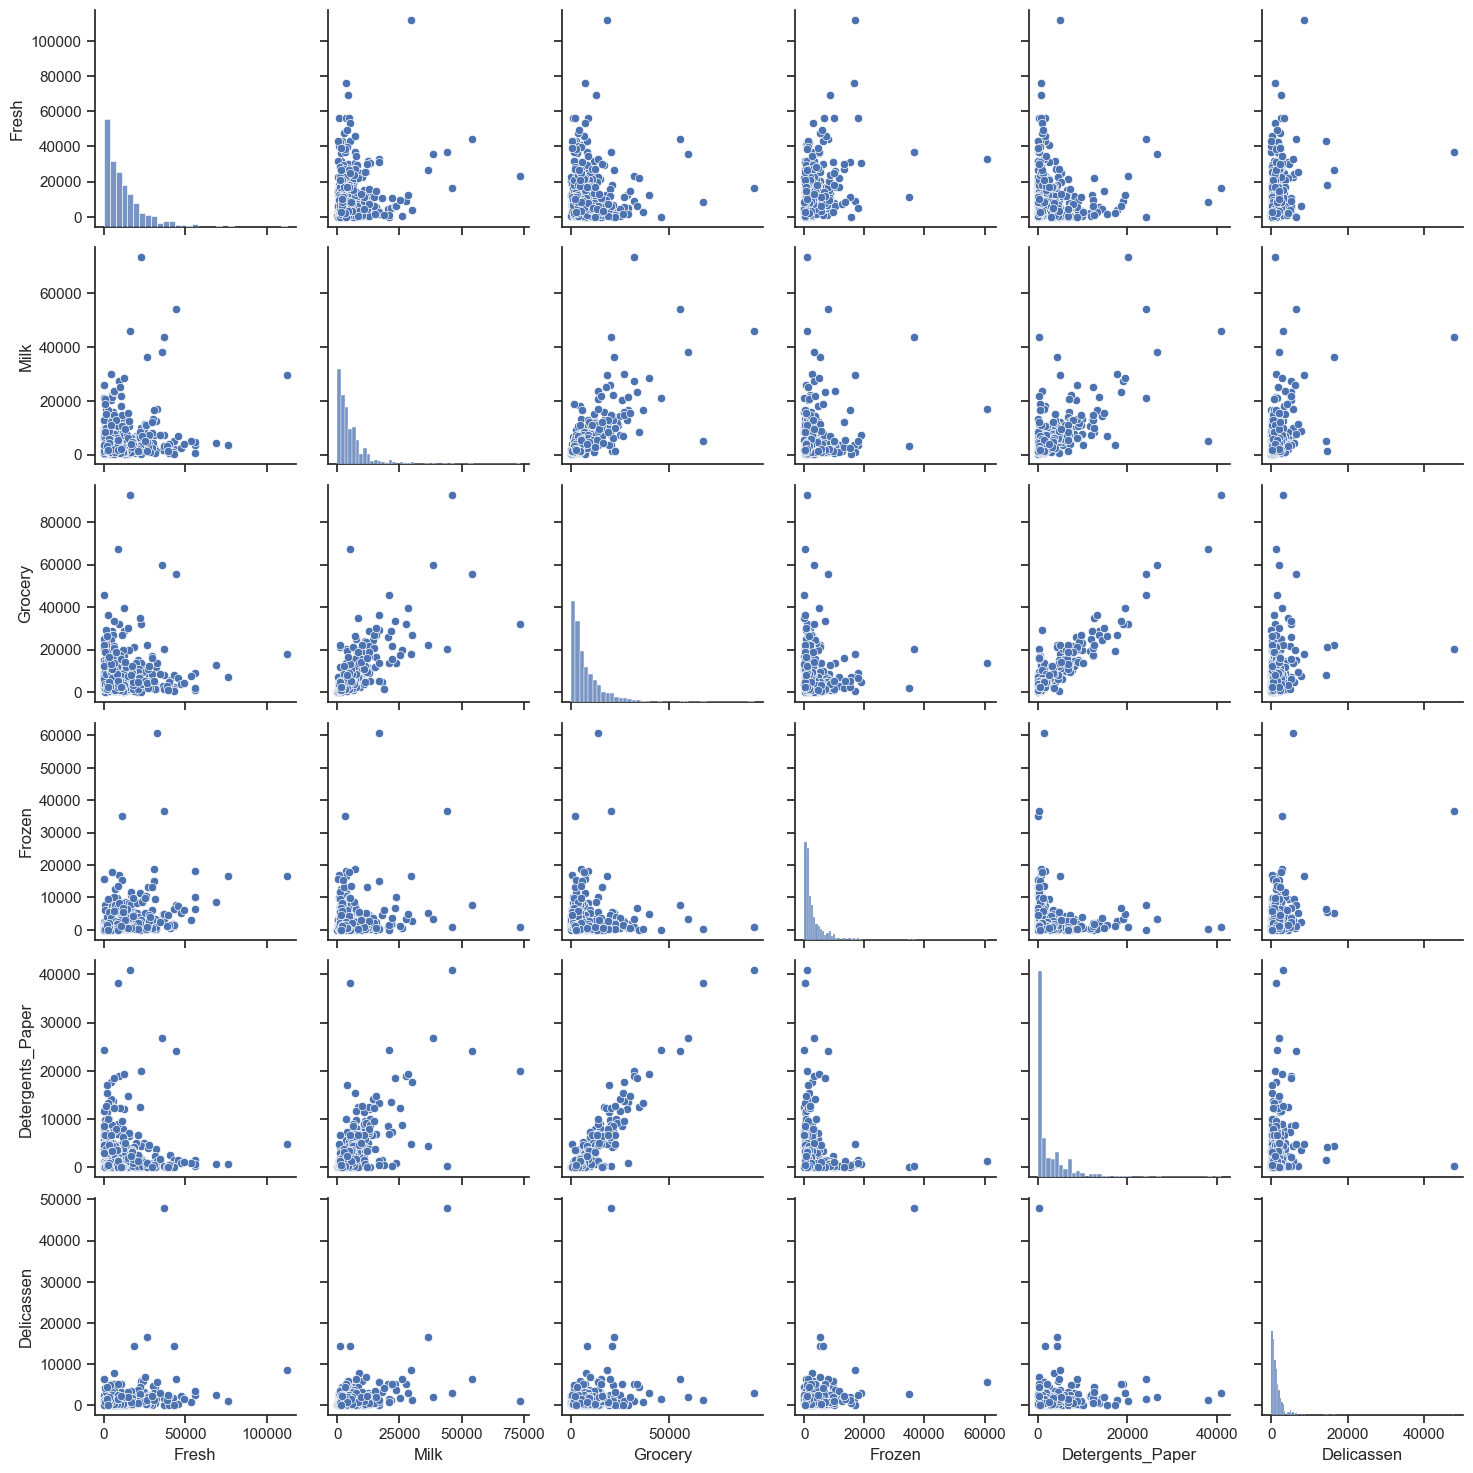

In [5]:
sns.set(style="ticks")
sns.pairplot(df.loc[:, ~df.columns.isin(['Channel', 'Region'])])
plt.show()

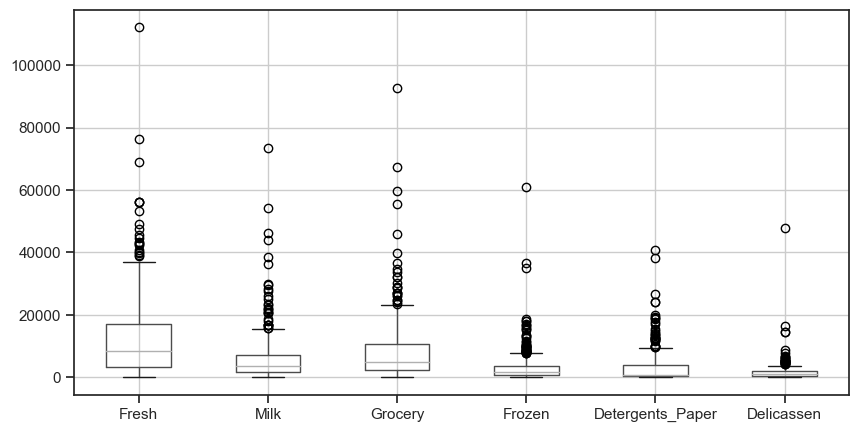

In [6]:
plt.figure(figsize=(10,5))
df_values = df.loc[:, ~df.columns.isin(['Channel', 'Region'])]
boxplot = df_values.boxplot(column=list(df_values.columns))
plt.show()

In [7]:
def remove_outliers(df, cut_off):
    for c in cut_off.keys():
        df = df[df[c] <= cut_off[c]]
    return df

In [8]:
cut_off_dict = {'Fresh': 60000, 'Milk': 60000, 'Grocery': 60000, 'Frozen': 60000, 'Detergents_Paper': 30000, 'Delicassen': 40000}
df = remove_outliers(df=df, cut_off=cut_off_dict)

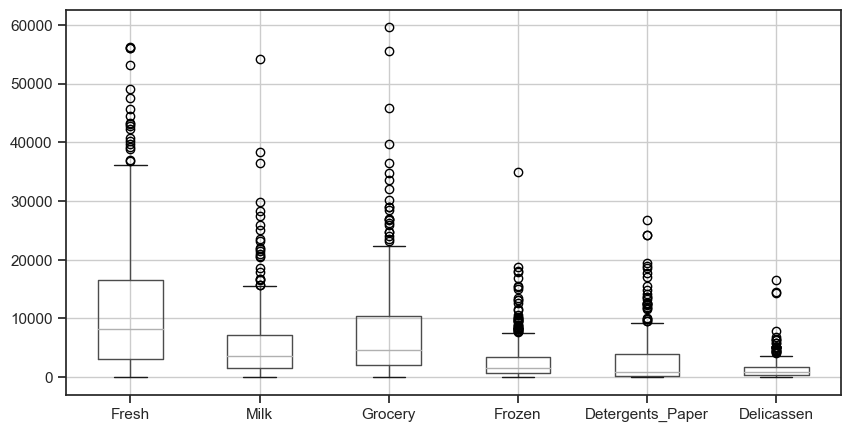

In [9]:
plt.figure(figsize=(10,5))
df_values = df.loc[:, ~df.columns.isin(['Channel', 'Region'])]
boxplot = df_values.boxplot(column=list(df_values.columns))
plt.show()

In [10]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scale)
scaled_df.head()

,0,1,2,3,4,5,6,7
0,1.0,1.0,0.225550,0.177127,0.126823,0.005402,0.100045,0.080811
1,1.0,1.0,0.125614,0.179968,0.160500,0.049651,0.123230,0.107324
2,1.0,1.0,0.113078,0.161483,0.128887,0.068031,0.131583,0.474637
3,0.0,1.0,0.236164,0.021050,0.070778,0.182340,0.018878,0.108051
4,1.0,1.0,0.402664,0.098793,0.120732,0.111194,0.066447,0.313680


In [11]:
km=KMeans(n_clusters=2, random_state=0)
y_predicted = km.fit_predict(scaled_df)
y_predicted

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [12]:
km.cluster_centers_

array([[ 1.00000000e+00,  8.05755396e-01,  1.55833877e-01,
         1.84411647e-01,  2.56556215e-01,  4.71031362e-02,
         2.51373880e-01,  1.06044995e-01],
       [-2.22044605e-16,  7.52559727e-01,  2.24140054e-01,
         5.75662464e-02,  6.34649642e-02,  9.46581919e-02,
         2.89830098e-02,  7.34759398e-02]])

In [13]:
def plot_clustering(
     df:pd.DataFrame,
     kmeans:KMeans,
     scaler:MinMaxScaler,
     x_column:str,
     y_column:str):

        """
        Plot the output of the K-Means clustering algorithm using the given x and y columns.

        Args:
                df (pd.DataFrame): The unscaled data used for clustering.
                kmeans (KMeans): The (trained) KMeans object.
                scaler (MinMaxScaler): The used MinMaxScaler object.
                x_column (str): Column name to plot along the X-axis.
                y_column (str): Column name to plot along the y-axis.
        """

        data = df.copy(deep=True)
        data['clusters'] = kmeans.labels_

        columns = list(data.columns)
        centers = scaler.inverse_transform(kmeans.cluster_centers_)

        #Plot all data points and their cluster assignment.
        sns.scatterplot(
        x=x_column,
        y=y_column,
        data=data,
        hue='clusters')

        #Plot the centroids of the K-Means algorithm.
        sns.scatterplot(
        x=centers[:,columns.index(x_column)],
        y=centers[:,columns.index(y_column)],
        color='red',
        s=300,
        marker='X')

        plt.show()

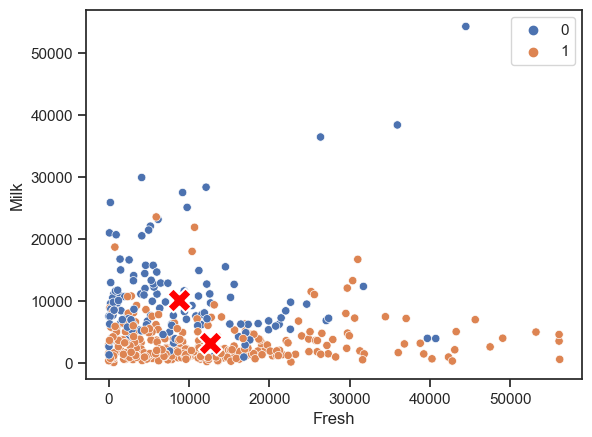

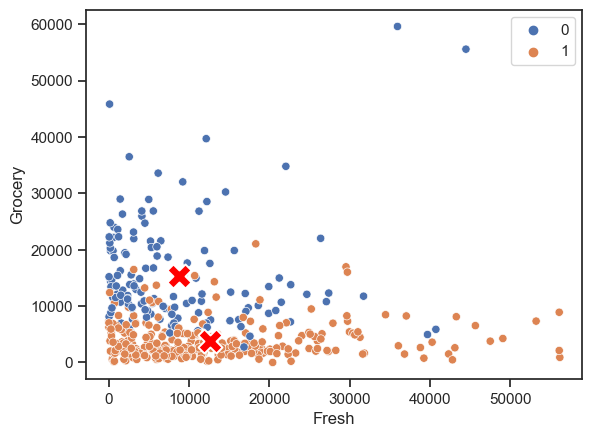

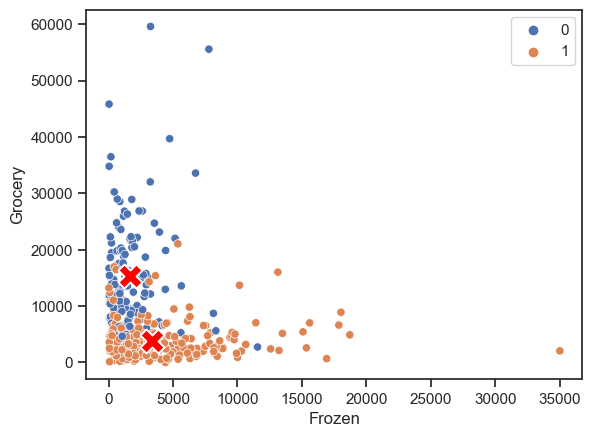

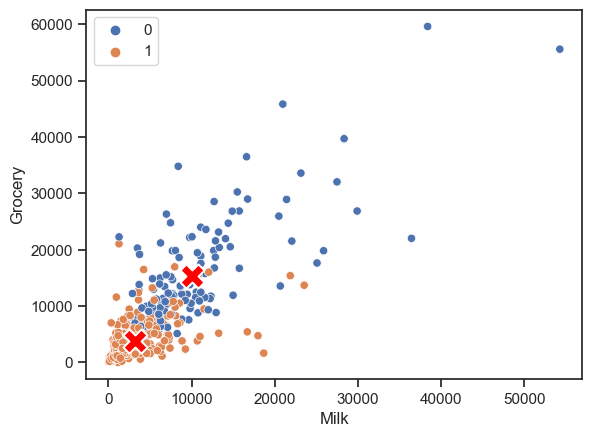

In [14]:
plot_clustering(df=df, kmeans=km, scaler=scaler, x_column="Fresh", y_column="Milk")
plot_clustering(df=df, kmeans=km, scaler=scaler, x_column="Fresh", y_column="Grocery")
plot_clustering(df=df, kmeans=km, scaler=scaler, x_column="Frozen", y_column="Grocery")
plot_clustering(df=df, kmeans=km, scaler=scaler, x_column="Milk", y_column="Grocery")

In [15]:
K=range(1,11)
wss = []

for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans=kmeans.fit(scaled_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

Text(0, 0.5, 'Within Cluster Variation (WCV)')

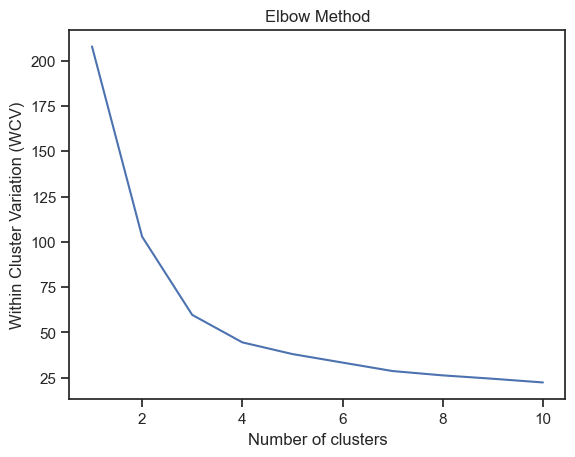

In [16]:
plt.plot(K,wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Variation (WCV)')

In [17]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(scaled_df)

In [18]:
clustered_df = df.copy(deep=True)
clustered_df['cluster'] = y_predicted
clustered_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,2
4,2,3,22615,5410,7198,3915,1777,5185,0


In [19]:
cluster_statistics = clustered_df.groupby(['cluster']).agg({
    'Channel': ['mean'],
    'Region': ['mean'],
    'Fresh': ['mean'], 
    'Milk': ['mean'], 
    'Grocery': ['mean'], 
    'Frozen': ['mean'], 
    'Detergents_Paper': ['mean'],
    'Delicassen': ['mean']
    })

cluster_statistics

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
,mean,mean,mean,mean,mean,mean,mean,mean
cluster,,,,,,,,
0,2.0,2.611511,8754.007194,10050.848921,15292.467626,1672.856115,6714.179856,1754.863309
1,1.0,1.313953,12264.313953,3210.197674,4034.767442,3308.186047,794.476744,1116.139535
2,1.0,3.000000,12725.038647,3160.830918,3681.507246,3348.294686,769.439614,1258.652174


In [20]:
cluster_statistics.columns = cluster_statistics.columns.droplevel(1)
cluster_statistics

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,2.0,2.611511,8754.007194,10050.848921,15292.467626,1672.856115,6714.179856,1754.863309
1,1.0,1.313953,12264.313953,3210.197674,4034.767442,3308.186047,794.476744,1116.139535
2,1.0,3.000000,12725.038647,3160.830918,3681.507246,3348.294686,769.439614,1258.652174


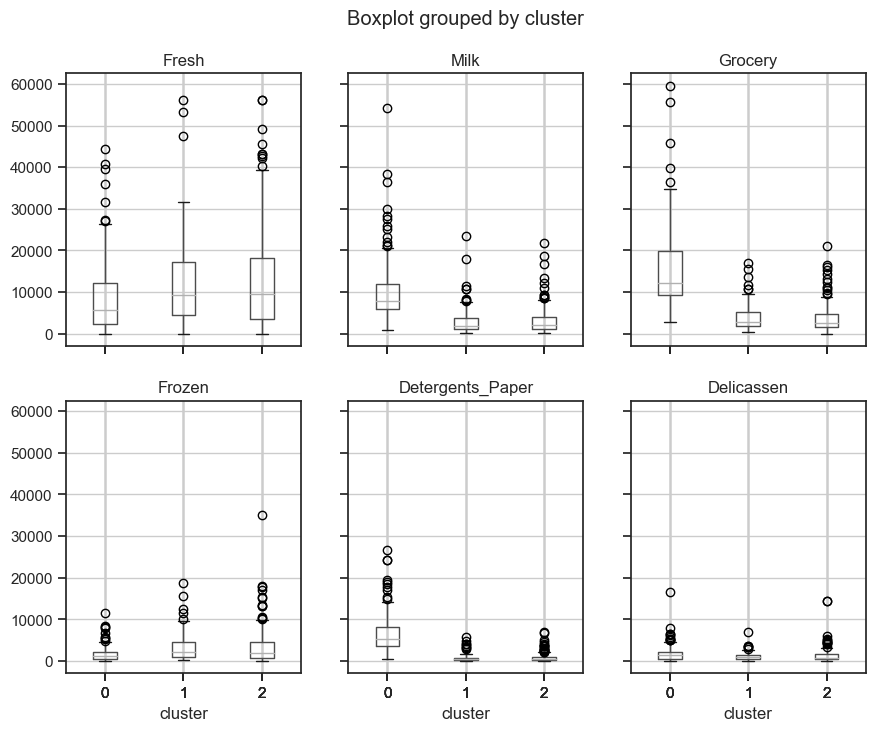

In [21]:
clustered_df = df.copy(deep=True)
clustered_df['cluster'] = y_predicted

boxplot = clustered_df.boxplot(
    column=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], 
    by='cluster', 
    layout=(2, 3), 
    figsize=(10, 8)
    )

In [ ]:
def plot_3d(df:pd.DataFrame, x:str, y:str, z:str, colors=('r', 'g', 'b', 'y')):
    """
    Create a 3D scatter plot for the K-Means clustering results

    Args:
        df (pd.DataFrame): DataFrame containing the (unscaled) data
        x (str): Name of the column to plot along the X-axis
        y (str): Name of the column to plot along the Y-axis
        z (str): Name of the column to plot along the Z-axis
    """
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for _, row in df.iterrows():
        if row[x] < 20000 and row[y] < 30000 and row[z] < 30000:
            ax.scatter(row[x], row[y], row[z], color=colors[row['cluster']])
    
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)

    plt.show()

In [ ]:
%matplotlib widget

In [ ]:
plot_3d(df=df_copy, x='Fresh', y='Milk', z='Grocery')

In [ ]:
plot_3d(df=df_copy, x='Frozen', y='Milk', z='Grocery')

In [ ]:
plot_3d(df=df_copy, x='Detergents_Paper', y='Milk', z='Grocery')

In [ ]:
plot_3d(df=df_copy, x='Delicassen', y='Milk', z='Grocery')

In [ ]:
df.head()